## Packages used
- Numpy : to make mathematical and numerical calculations faster and simpler
- Matplotlib : to visualize the results and errors graphically

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Primary value u(0)

In [5]:
u0 = 1

## End of time

In [8]:
T = 5

## Number of time steps

In [11]:
N = 100

## Time step length

In [14]:
k = T / N  

## Matrix of times

In [17]:
t = np.linspace(0, T, N+1)

## The analytical solution
#### - The analytical solution is the “truth solution” that we use to compare with the numerical approximations and to evaluate the error.
![Analytical Solution](https://github.com/gezzzo/discretization-method/blob/main/methods/analytical-solution.png?raw=true)

In [20]:
def analytic_solution(t, u0):
    return u0 * np.exp(t)

## Explicit Euler Formula
![Explicit Euler](https://github.com/gezzzo/python-assignments/blob/main/first-assigment-discretization-method/methods/explicit-euler.png?raw=true)

In [23]:
def explicit_euler(u0, k, N):
    u = np.empty(N+1)
    u[0] = u0
    for n in range(N):
        u[n+1] = u[n] + k * u[n]
    return u

## Implicit Euler Formula
![Implicit Euler](https://github.com/gezzzo/python-assignments/blob/main/first-assigment-discretization-method/methods/implicit-euler.png?raw=true)

In [26]:
def implicit_euler(u0, k, N):
    u = np.empty(N+1)
    u[0] = u0
    for n in range(N):
        u[n+1] = u[n] / (1 - k)
    return u

## Trapezoidal Formula
![Trapezoidal](https://github.com/gezzzo/python-assignments/blob/main/first-assigment-discretization-method/methods/trapezoidal.png?raw=true)

In [29]:
def trapezoidal(u0, k, N):
    u = np.empty(N+1)
    u[0] = u0
    a = (1 + k/2) / (1 - k/2)
    for n in range(N):
        u[n+1] = a * u[n]
    return u

In [31]:
u_exact = analytic_solution(t, u0)
u_exp = explicit_euler(u0, k, N)
u_imp = implicit_euler(u0, k, N)
u_trap = trapezoidal(u0, k, N)

## Plotting three solutions together with the analytical

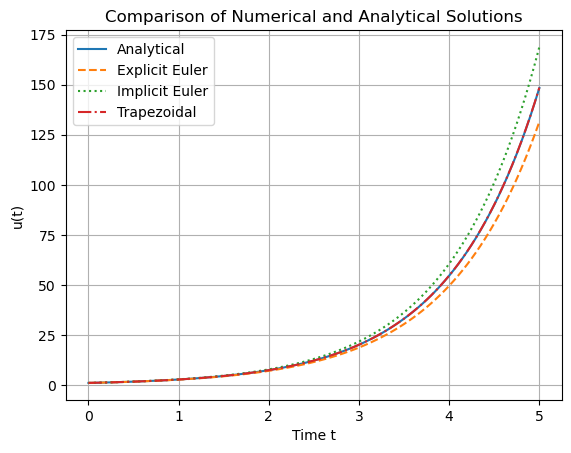

In [34]:
plt.plot(t, u_exact, label="Analytical")
plt.plot(t, u_exp, '--', label="Explicit Euler")
plt.plot(t, u_imp, ':', label="Implicit Euler")
plt.plot(t, u_trap, '-.', label="Trapezoidal")
plt.xlabel("Time t")
plt.ylabel("u(t)")
plt.title("Comparison of Numerical and Analytical Solutions")
plt.legend()
plt.grid(True)
plt.show()

## Plotting the error absolute

In [37]:
abs_err_exp = np.abs(u_exp - u_exact)
abs_err_imp = np.abs(u_imp - u_exact)
abs_err_trap = np.abs(u_trap - u_exact)

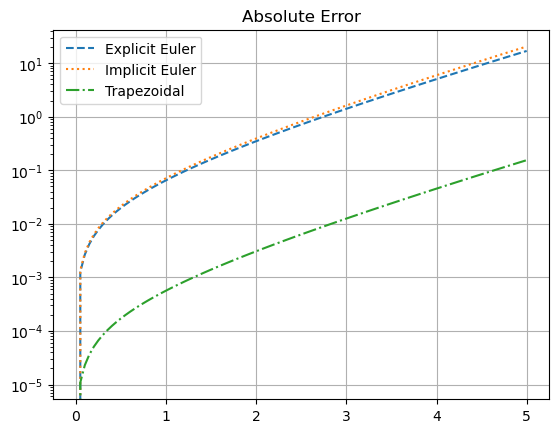

In [39]:
plt.plot(t, abs_err_exp, '--', label="Explicit Euler")
plt.plot(t, abs_err_imp, ':', label="Implicit Euler")
plt.plot(t, abs_err_trap, '-.', label="Trapezoidal")
plt.yscale("log")
plt.title("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

## Plotting the error relative

In [42]:
rel_err_exp = abs_err_exp / np.abs(u_exact)
rel_err_imp = abs_err_imp / np.abs(u_exact)
rel_err_trap = abs_err_trap / np.abs(u_exact)

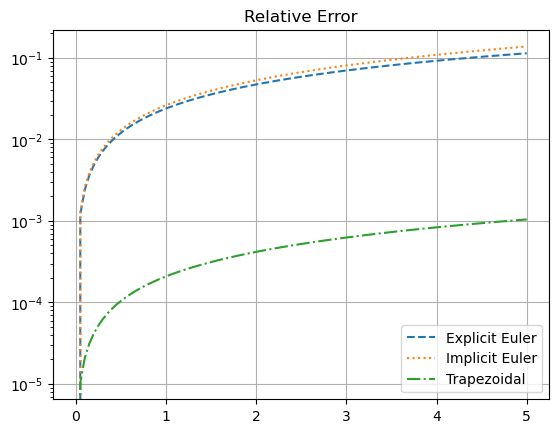

In [44]:
plt.plot(t, rel_err_exp, '--', label="Explicit Euler")
plt.plot(t, rel_err_imp, ':', label="Implicit Euler")
plt.plot(t, rel_err_trap, '-.', label="Trapezoidal")
plt.yscale("log")
plt.title("Relative Error")
plt.legend()
plt.grid(True)
plt.show()